In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
# Seleção dos dados que serão utilizados na análise
dataset2017 = pd.read_csv('../Deputados/data/Ano-2017.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)
dataset2016 = pd.read_csv('../Deputados/data/Ano-2016.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)
dataset2015 = pd.read_csv('../Deputados/data/Ano-2015.csv', sep=';',
                         dtype={'idecadastro': np.str,
                                'ideDocumento': np.str},
                         converters={'vlrLiquido': lambda x: float(x.replace(',','.'))},
                         low_memory=False)


# Organização dos dados, limpeza de colunas descartáveis, renomeação de categorias
dataset = pd.concat([dataset2017, dataset2016, dataset2015])
dataset = dataset[['txNomeParlamentar',
                   'nuLegislatura',
                   'sgPartido',
                   'idecadastro', 
                   'sgUF', 
                   'numSubCota', 
                   'txtDescricao', 
                   'datEmissao', 
                   'vlrLiquido', 
                   'numMes', 
                   'numAno', 
                   'ideDocumento']]
dataset['txtDescricao'] = dataset['txtDescricao'].astype('category')
dataset['txtDescricao'].cat.rename_categories(['Assinatura de publicações', 
                                              'Combustíveis e lubrificantes',
                                              'Consultorias, pesquisas e trabalhos técnicos',
                                              'Divulgação de atividade parlamentar', 
                                              'Emissão de bilhete aéreo',
                                              'Alimentação do parlamentar',
                                              'Hospedagem fora do DF',
                                              'Aluguel de aeronaves',
                                              'Aluguel de embarcações',
                                              'Aluguel de carros', 
                                              'Manutenção de escritório',
                                              'Cursos, palestras ou eventos', 
                                              'Passagens aéreas',
                                              'Passagens terrestres ou marítimas',
                                              'Segurança particular',
                                              'Táxi, pedágio e estacionamento', 
                                              'Serviços postais', 
                                              'Telefonia'], inplace=True)
dataset['txtDescricao'] = dataset['txtDescricao'].astype(str)

In [3]:
dataset = dataset[dataset['nuLegislatura']== 2015]

In [4]:
posse = pd.read_csv('../Deputados/scrapers/Atuacao_Deputados.csv', encoding='latin1', sep=';')

In [5]:
from datetime import date

def tempo_servico(periodo):
    dias = 0
    if periodo == "1/2/2015 ...":
        periodo = periodo.split(" ")[0]
        periodo = periodo.split("/")
        comeco = date(day= int(periodo[0]), month= int(periodo[1]), year= int(periodo[2]))
        hoje = date(day=21, month=8, year=2017)
        dif = hoje - comeco
        return int(math.ceil(dif.days/30))
    else:
        periodo = periodo.split(",")
        for atuacao in periodo:
            comeco = atuacao.split("até")[0]
            comeco = comeco.split("/")
            comeco = date(day= int(comeco[0]), month= int(comeco[1]), year= int(comeco[2].split(" ")[0]))
            if "..." not in atuacao:
                fim = atuacao.split("até")[1]
                fim = fim.split("/")
                fim = date(day= int(fim[0]), month= int(fim[1]), year= int(fim[2]))
                dif = fim - comeco
                dias += dif.days
            else:
                hoje = date(day=21, month=8, year=2017)
                dif = hoje - comeco
                dias += dif.days
        return int(math.ceil(dias/30))
                

In [6]:
posse['Atuacao em meses'] = posse['Atuacao'].apply(tempo_servico)
#posse['Atuacao em meses'] = posse['Atuacao em meses'].map("{0:.2f}".format)

In [7]:
dataset.rename(columns={'txNomeParlamentar':'Nome'}, inplace=True)
dataset = posse.merge(dataset,on='Nome')
dataset.drop(['Nome', 'nuLegislatura'], axis=1,inplace=True) #dataset.drop(['Nome','sgUF'], axis=1,inplace=True)

In [8]:
dados = pd.read_csv('../Deputados/scrapers/Detalhes_Deputados.csv',encoding='latin1')
#dados = dados[dados['Legislatura'] == 55]
dados.drop(['Legislatura','UF'], axis=1,inplace=True)
dados.rename(columns={'Partido': 'Partido Atual','Nome':'Nome Civil'}, inplace=True)
dados['idecadastro'] = dados['idecadastro'].astype(str)
dataset = dados.merge(dataset,on='idecadastro')

In [9]:
dados.head(5)

idecadastro                      Nome Civil      Nome Parlamentar  \
0      178957   ABEL SALVADOR MESQUITA JUNIOR     ABEL MESQUITA JR.   
1      178864       JOSE ADAIL CARNEIRO SILVA        ADAIL CARNEIRO   
2      178914  ADALBERTO CAVALCANTI RODRIGUES  ADALBERTO CAVALCANTI   
3      178890            ADELMO CARNEIRO LEAO  ADELMO CARNEIRO LEÃO   
4      178968      ADELSON BARRETO DOS SANTOS       ADELSON BARRETO   

                   Profissao Situacao na Legislatura Atual Sexo Partido Atual  
0                 Empresário                  Em Exercício    M           DEM  
1                          -                  Em Exercício    M            PP  
2  Administrador de Empresas                  Em Exercício    M           PTB  
3               Professor(a)                  Em Exercício    M            PT  
4      Jornalista,Radialista                  Em Exercício    M            PR

In [10]:
dataset.head(5)

idecadastro                     Nome Civil   Nome Parlamentar   Profissao  \
0      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
1      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
2      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
3      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
4      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   

  Situacao na Legislatura Atual Sexo Partido Atual       Atuacao  \
0                  Em Exercício    M           DEM  1/2/2015 ...   
1                  Em Exercício    M           DEM  1/2/2015 ...   
2                  Em Exercício    M           DEM  1/2/2015 ...   
3                  Em Exercício    M           DEM  1/2/2015 ...   
4                  Em Exercício    M           DEM  1/2/2015 ...   

   Atuacao em meses sgPartido sgUF  numSubCota                  txtDescricao  \
0                32       DEM   RR           1      Manutenção de escritório   
1                32       DEM   RR           3  Combustíveis e lubrificantes   
2                32       DEM   RR           3  Combustíveis e lubrificantes   
3                32       DEM   RR           3  Combustíveis e lubrificantes   
4                32       DEM   RR           3  Combustíveis e lubrificantes   

            datEmissao  vlrLiquido  numMes  numAno ideDocumento  
0  2017-04-26 00:00:00       296.0       4    2017      6266962  
1  2017-05-03 00:00:00       100.0       5    2017      6306682  
2  2017-05-08 00:00:00       150.0       5    2017      6306518  
3  2017-05-10 00:00:00        60.0       5    2017      6306675  
4  2017-05-11 00:00:00        50.0       5    2017      6306669

In [11]:
dataset.to_csv("CEAP-BR.csv", sep=';', encoding='latin1',index=False)

In [12]:
# Contagem de notas fiscais em análise, por categoria
print("Quantidade de notas fiscais em análise, por categoria:")
dataset['txtDescricao'].value_counts()

Quantidade de notas fiscais em análise, por categoria:


Emissão de bilhete aéreo                        271112
Combustíveis e lubrificantes                    181048
Telefonia                                        84677
Serviços postais                                 74712
Alimentação do parlamentar                       69315
Táxi, pedágio e estacionamento                   68428
Manutenção de escritório                         56900
Divulgação de atividade parlamentar              26406
Aluguel de carros                                15255
Hospedagem fora do DF                            14528
Consultorias, pesquisas e trabalhos técnicos      7322
Passagens aéreas                                  6455
Passagens terrestres ou marítimas                 2516
Segurança particular                              2241
Assinatura de publicações                         2183
Aluguel de aeronaves                               815
Aluguel de embarcações                              82
Cursos, palestras ou eventos                        57
Name: txtD

In [13]:
dataset.head()

idecadastro                     Nome Civil   Nome Parlamentar   Profissao  \
0      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
1      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
2      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
3      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   
4      178957  ABEL SALVADOR MESQUITA JUNIOR  ABEL MESQUITA JR.  Empresário   

  Situacao na Legislatura Atual Sexo Partido Atual       Atuacao  \
0                  Em Exercício    M           DEM  1/2/2015 ...   
1                  Em Exercício    M           DEM  1/2/2015 ...   
2                  Em Exercício    M           DEM  1/2/2015 ...   
3                  Em Exercício    M           DEM  1/2/2015 ...   
4                  Em Exercício    M           DEM  1/2/2015 ...   

   Atuacao em meses sgPartido sgUF  numSubCota                  txtDescricao  \
0                32       DEM   RR           1      Manutenção de escritório   
1                32       DEM   RR           3  Combustíveis e lubrificantes   
2                32       DEM   RR           3  Combustíveis e lubrificantes   
3                32       DEM   RR           3  Combustíveis e lubrificantes   
4                32       DEM   RR           3  Combustíveis e lubrificantes   

            datEmissao  vlrLiquido  numMes  numAno ideDocumento  
0  2017-04-26 00:00:00       296.0       4    2017      6266962  
1  2017-05-03 00:00:00       100.0       5    2017      6306682  
2  2017-05-08 00:00:00       150.0       5    2017      6306518  
3  2017-05-10 00:00:00        60.0       5    2017      6306675  
4  2017-05-11 00:00:00        50.0       5    2017      6306669

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884052 entries, 0 to 884051
Data columns (total 18 columns):
idecadastro                      884052 non-null object
Nome Civil                       884052 non-null object
Nome Parlamentar                 884052 non-null object
Profissao                        884052 non-null object
Situacao na Legislatura Atual    884052 non-null object
Sexo                             884052 non-null object
Partido Atual                    884052 non-null object
Atuacao                          884052 non-null object
Atuacao em meses                 884052 non-null int64
sgPartido                        884052 non-null object
sgUF                             884052 non-null object
numSubCota                       884052 non-null int64
txtDescricao                     884052 non-null object
datEmissao                       866179 non-null object
vlrLiquido                       884052 non-null float64
numMes                           884052 non-null i

In [15]:
dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum().sort_values(ascending=False)

Nome Civil                                sgPartido
JOHNATHAN PEREIRA DE JESUS                PRB          1369412.36
ÉDIO VIEIRA LOPES                         PR           1355543.07
VINICIUS DE AZEVEDO GURGEL                PR           1322934.08
ALAN RICK MIRANDA                         PRB          1318617.83
NILTON BALBINO                            PTB          1316208.00
HIRAN MANUEL GONCALVES DA SILVA           PP           1309990.52
ABEL SALVADOR MESQUITA JUNIOR             DEM          1294642.78
REMIDIO MONAI MONTESSI                    PR           1294119.17
JESSICA ROJAS SALES                       PMDB         1288358.20
CARLOS AUGUSTO ANDRADE SILVA              PHS          1286133.89
LINDOMAR BARBOSA ALVES                    PRB          1274964.91
WHERLES FERNANDES DA ROCHA                PSDB         1274357.75
ZENAIDE MAIA CALADO PEREIRA DOS SANTOS    PR           1274016.86
DOMINGOS GOMES DE AGUIAR NETO             PSD          1273739.30
LEONARDO CUNHA DE BRITO 

In [16]:
dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum().sort_values()

Nome Civil                                sgPartido
MARCIO CAMPOS MONTEIRO                    PSDB              14.18
ROGÉRIO SILVA SANTOS                      PMDB              41.87
SEBASTIAO IGNACIO DE OLIVEIRA JUNIOR      PR               116.41
JOSIAS GOMES DA SILVA                     PT              1003.62
MIGUEL CORRÊA DA SILVA JÚNIOR             PT              1840.11
ODAIR JOSÉ DA CUNHA                       PT              1897.29
FELIPE AUGUSTO LYRA CARRERAS              PSB             3025.76
GIOVANI BATISTA FELTES                    PMDB            4206.66
NELSON NAHIM MATHEUS DE OLIVEIRA          PSD             5086.14
ARNALDO CALIL PEREIRA JARDIM              PPS             6208.88
ATILA ALEXANDRE NUNES PEREIRA             PMDB            6485.39
ANTONIO FLORIANO PEREIRA PESARO           PSDB           12090.88
RODRIGO SANTOS DA ROCHA LOURES            PMDB           12678.29
REJANE RIBEIRO SOUSA DIAS                 PT             13212.61
MARCIO DELLA VALLE BIOLC

In [17]:
df = dataset.groupby(['Nome Civil','sgPartido','numAno']).sum()

In [18]:
result_df = df.loc[df.index.get_level_values('numAno') == 2017]
result_df['vlrLiquido'].sort_values(ascending=False)

Nome Civil                               sgPartido  numAno
ALAN RICK MIRANDA                        PRB        2017      304308.39
ZENAIDE MAIA CALADO PEREIRA DOS SANTOS   PR         2017      292961.27
NIVALDO FERREIRA DE ALBUQUERQUE NETO     PRP        2017      292045.65
LUIZ ODORICO MONTEIRO DE ANDRADE         PSB        2017      290129.15
CARLOS VICTOR GUTERRES MENDES            PSD        2017      287691.11
LINDOMAR BARBOSA ALVES                   PRB        2017      286413.18
JOHNATHAN PEREIRA DE JESUS               PRB        2017      285700.63
MARIA GORETE PEREIRA                     PR         2017      283143.82
EXPEDITO GONCALVES FERREIRA NETTO        PSD        2017      282343.86
DAGOBERTO NOGUEIRA FILHO                 PDT        2017      282333.90
MOISES DINIZ LIMA                        PCdoB      2017      280072.05
RUBENS PEREIRA E SILVA JUNIOR            PCdoB      2017      279198.90
JESSICA ROJAS SALES                      PMDB       2017      278309.44
VANDE

In [19]:
valor = dataset.groupby('sgPartido')['vlrLiquido'].sum().sort_values(ascending=False)
valor.head(30)

sgPartido
PMDB     6.689220e+07
PT       6.163547e+07
PP       4.848202e+07
PSDB     4.838382e+07
PR       4.077421e+07
PSD      3.779344e+07
PSB      3.626992e+07
DEM      2.878404e+07
PRB      2.521972e+07
PDT      2.110137e+07
PTB      2.053458e+07
PODE     1.535471e+07
SD       1.453428e+07
PCdoB    1.282658e+07
PPS      8.531037e+06
PSC      8.528746e+06
PHS      7.010041e+06
PV       6.107823e+06
PSOL     5.137567e+06
PROS     3.866179e+06
REDE     3.429493e+06
PTdoB    3.315743e+06
PEN      3.135566e+06
PSL      2.101042e+06
PMB      1.023936e+06
PRP      6.053950e+05
PRTB     1.674133e+05
Name: vlrLiquido, dtype: float64

In [20]:
df = dataset.groupby(['Nome Civil','sgPartido'])['vlrLiquido'].sum()

In [21]:
qtd = df.index.get_level_values('sgPartido').value_counts()
qtd.head(30)

PMDB     81
PT       68
PSDB     59
PP       53
PR       43
PSD      42
PSB      41
DEM      32
PRB      26
PDT      25
PTB      21
PODE     16
SD       14
PCdoB    14
PPS      12
PSC      11
PV        8
PHS       7
PSOL      6
PROS      5
PTdoB     4
REDE      4
PEN       3
PSL       2
PRP       1
PMB       1
PRTB      1
Name: sgPartido, dtype: int64

In [22]:
partidos = pd.DataFrame(data=list(qtd.sort_index()),index=list(qtd.sort_index().index),columns=['Quantidade'])

In [23]:
partidos['vlrLiquido'] = list(valor.sort_index())
partidos['Media'] = partidos['vlrLiquido']/partidos['Quantidade']
partidos['Media'] = partidos['Media'].map("R$ {0:.2f}".format)
partidos.sort_values('Media',ascending=False)

Quantidade    vlrLiquido          Media
PTB            21  2.053458e+07   R$ 977837.21
PRB            26  2.521972e+07   R$ 969989.27
PODE           16  1.535471e+07   R$ 959669.07
PR             43  4.077421e+07   R$ 948237.43
PCdoB          14  1.282658e+07   R$ 916184.40
PP             53  4.848202e+07   R$ 914755.17
PT             68  6.163547e+07   R$ 906403.92
PSD            42  3.779344e+07   R$ 899843.89
DEM            32  2.878404e+07   R$ 899501.13
PSB            41  3.626992e+07   R$ 884632.09
REDE            4  3.429493e+06   R$ 857373.17
PSOL            6  5.137567e+06   R$ 856261.20
PDT            25  2.110137e+07   R$ 844054.96
PTdoB           4  3.315743e+06   R$ 828935.85
PMDB           81  6.689220e+07   R$ 825829.59
PSDB           59  4.838382e+07   R$ 820064.66
PSC            11  8.528746e+06   R$ 775340.57
PROS            5  3.866179e+06   R$ 773235.87
PV              8  6.107823e+06   R$ 763477.88
PPS            12  8.531037e+06   R$ 710919.73
PRP             1  6.053950e+05   R$ 605394.97
PRTB            1  1.674133e+05   R$ 167413.30
PSL             2  2.101042e+06  R$ 1050521.13
PEN             3  3.135566e+06  R$ 1045188.61
SD             14  1.453428e+07  R$ 1038162.85
PMB             1  1.023936e+06  R$ 1023936.32
PHS             7  7.010041e+06  R$ 1001434.45

In [24]:
aux = pd.pivot_table(dataset[['vlrLiquido','sgPartido','txtDescricao']], index=['sgPartido'],
...                     columns=['txtDescricao'], aggfunc='sum', fill_value= 0)  

aux = aux['vlrLiquido']
aux['Total CEAP'] = aux.sum(axis=1)
aux.sort_values('Total CEAP',ascending=False,inplace=True)

In [25]:
sum(aux.loc['DEM']) #bateu

57568072.500000246

In [26]:
aux.sum().sort_values(ascending=False)

txtDescricao
Total CEAP                                      5.315463e+08
Divulgação de atividade parlamentar             1.241658e+08
Emissão de bilhete aéreo                        1.169253e+08
Aluguel de carros                               6.418184e+07
Manutenção de escritório                        5.856139e+07
Consultorias, pesquisas e trabalhos técnicos    5.404658e+07
Combustíveis e lubrificantes                    4.495093e+07
Telefonia                                       2.848945e+07
Serviços postais                                9.818340e+06
Aluguel de aeronaves                            7.510821e+06
Passagens aéreas                                6.348578e+06
Hospedagem fora do DF                           4.814662e+06
Segurança particular                            4.061726e+06
Alimentação do parlamentar                      4.012306e+06
Táxi, pedágio e estacionamento                  2.242253e+06
Assinatura de publicações                       7.947144e+05
Cursos, pal

In [27]:
def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [28]:
pct = aux.drop('Total CEAP', axis=1)
for partido in dataset['sgPartido'].unique():
    pct.loc[partido] = (pct.loc[partido]/sum(pct.loc[partido]))*100

pct.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [29]:
sum(pct.loc['DEM']) #bateu

100.00000000000003

In [30]:
aux['Manutenção de escritório']

sgPartido
PMDB     6190239.89
PT       9080986.20
PP       4807841.24
PSDB     6355994.30
PR       5046458.05
PSD      3679492.55
PSB      3885998.95
DEM      2223739.21
PRB      2670495.25
PDT      2087366.39
PTB      1780436.52
PODE     1294543.49
SD       1728279.00
PCdoB    1881592.28
PPS      1013828.48
PSC       656973.49
PHS       604312.56
PV        617257.08
PSOL     1020498.69
PROS      388861.69
REDE      680698.64
PTdoB     435963.47
PEN       239853.34
PSL       184912.37
PMB         3654.23
PRP         1116.12
PRTB           0.00
Name: Manutenção de escritório, dtype: float64

In [31]:
dep = pd.pivot_table(dataset[['vlrLiquido','Nome Civil','txtDescricao']], index=['Nome Civil'],
...                     columns=['txtDescricao'], aggfunc='sum', fill_value= 0)  

dep = dep['vlrLiquido']
dep['Total CEAP'] = dep.sum(axis=1)
dep.sort_values('Total CEAP',ascending=False,inplace=True)
dep.head()

txtDescricao                Alimentação do parlamentar  Aluguel de aeronaves  \
Nome Civil                                                                     
JOHNATHAN PEREIRA DE JESUS                        0.00                   0.0   
ÉDIO VIEIRA LOPES                               648.75               60625.0   
VINICIUS DE AZEVEDO GURGEL                        0.00                   0.0   
ALAN RICK MIRANDA                             13222.13                5000.0   
NILTON BALBINO                                    0.00                   0.0   

txtDescricao                Aluguel de carros  Aluguel de embarcações  \
Nome Civil                                                              
JOHNATHAN PEREIRA DE JESUS          308000.00                     0.0   
ÉDIO VIEIRA LOPES                   244770.85                  5500.0   
VINICIUS DE AZEVEDO GURGEL          208722.80                     0.0   
ALAN RICK MIRANDA                   131429.02                     0.0   
NILTON BALBINO                      289000.00                     0.0   

txtDescricao                Assinatura de publicações  \
Nome Civil                                              
JOHNATHAN PEREIRA DE JESUS                        0.0   
ÉDIO VIEIRA LOPES                                 0.0   
VINICIUS DE AZEVEDO GURGEL                        0.0   
ALAN RICK MIRANDA                              1800.0   
NILTON BALBINO                                    0.0   

txtDescricao                Combustíveis e lubrificantes  \
Nome Civil                                                 
JOHNATHAN PEREIRA DE JESUS                     145531.42   
ÉDIO VIEIRA LOPES                              125659.81   
VINICIUS DE AZEVEDO GURGEL                     142714.78   
ALAN RICK MIRANDA                              136743.65   
NILTON BALBINO                                  84023.23   

txtDescricao                Consultorias, pesquisas e trabalhos técnicos  \
Nome Civil                                                                 
JOHNATHAN PEREIRA DE JESUS                                      268000.0   
ÉDIO VIEIRA LOPES                                                21227.1   
VINICIUS DE AZEVEDO GURGEL                                       95000.0   
ALAN RICK MIRANDA                                               103495.0   
NILTON BALBINO                                                       0.0   

txtDescricao                Cursos, palestras ou eventos  \
Nome Civil                                                 
JOHNATHAN PEREIRA DE JESUS                           0.0   
ÉDIO VIEIRA LOPES                                    0.0   
VINICIUS DE AZEVEDO GURGEL                           0.0   
ALAN RICK MIRANDA                                    0.0   
NILTON BALBINO                                       0.0   

txtDescricao                Divulgação de atividade parlamentar  \
Nome Civil                                                        
JOHNATHAN PEREIRA DE JESUS                            445300.00   
ÉDIO VIEIRA LOPES                                     259670.00   
VINICIUS DE AZEVEDO GURGEL                            102000.00   
ALAN RICK MIRANDA                                     604170.00   
NILTON BALBINO                                        572093.14   

txtDescricao                Emissão de bilhete aéreo  Hospedagem fora do DF  \
Nome Civil                                                                    
JOHNATHAN PEREIRA DE JESUS                 166817.44                6884.40   
ÉDIO VIEIRA LOPES                          438299.65                9322.74   
VINICIUS DE AZEVEDO GURGEL                 230848.25                   0.00   
ALAN RICK MIRANDA                          201540.87               10692.75   
NILTON BALBINO                             264098.07                   0.00   

txtDescricao                Manutenção de escritório  Passagens aéreas  \
Nome Civil                                            

In [32]:
pctDp = dep.drop('Total CEAP', axis=1)
for deputado in dataset['Nome Civil'].unique():
    pctDp.loc[deputado] = (pctDp.loc[deputado]/sum(pctDp.loc[deputado]))*100

pctDp.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [33]:
# Soma de pessoas que utilizaram a CEAP na atual legislatura
print("Pessoas que utilizaram a CEAP:", dataset.idecadastro.nunique())

Pessoas que utilizaram a CEAP: 600


In [34]:
#dep1 = pd.read_csv('candidatos-2014-RJ-deputado-federal.csv',encoding='latin1',sep=';')

In [35]:
dep2 = pd.read_csv('Resultado_da_Eleicao.csv',encoding='latin1',sep=';',
                   converters={'Votação': lambda x: int(x.replace('.',''))})

In [36]:
#dep1.head()

In [37]:
#dep1.drop(['Situação Pós-Pleito','Cargo','Situação','Partido','Coligação'], axis=1,inplace=True)

In [38]:
#dep1.head()

In [39]:
dep2.head()

UF             Cargo      Nr                        Candidato Partido  \
0   AC  Deputado Federal  1314.0     RAIMUNDO ANGELIM VASCONCELOS      PT   
1  NaN               NaN  4040.0  CARLOS CESAR CORREIA DE MESSIAS     PSB   
2  NaN               NaN  4545.0       WHERLES FERNANDES DA ROCHA    PSDB   
3  NaN               NaN  1331.0          LEONARDO CUNHA DE BRITO      PT   
4  NaN               NaN  1515.0              JÉSSICA ROJAS SALES    PMDB   

                                           Coligação       Situação  Votação  \
0  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    39844   
1  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    26448   
2  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    23466   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    20876   
4  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    20339   

  % Válidos  Unnamed: 9  
0      9,98         NaN  
1      6,63         NaN  
2      5,88         NaN  
3      5,23         NaN  
4      5,09         NaN

In [40]:
dep2.drop(['UF','Cargo','Nr','Unnamed: 9'], axis=1,inplace=True)
dep2['% Válidos'] = dep2['% Válidos'].astype(str)
dep2['% Válidos'] = dep2['% Válidos'].apply(lambda x: float(x.replace(',','.')))
dep2 = dep2[dep2['Situação']!= 'Não eleito']
#dep2 = dep2[dep2['Votação']!= 7079046]
#dep2['Nr'] = dep2['Nr'].astype(int)

In [41]:
dep2.head()

Candidato Partido  \
0     RAIMUNDO ANGELIM VASCONCELOS      PT   
1  CARLOS CESAR CORREIA DE MESSIAS     PSB   
2       WHERLES FERNANDES DA ROCHA    PSDB   
3          LEONARDO CUNHA DE BRITO      PT   
4              JÉSSICA ROJAS SALES    PMDB   

                                           Coligação       Situação  Votação  \
0  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    39844   
1  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    26448   
2  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    23466   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    20876   
4  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    20339   

   % Válidos  
0       9.98  
1       6.63  
2       5.88  
3       5.23  
4       5.09

In [42]:
dep2.rename(columns={'Candidato':'Nome Civil'}, inplace=True) #dep1.rename(columns={'Número': 'Nr','Nome Completo':'Nome Civil'}, inplace=True)
deps = dep2 #deps = dep1.merge(dep2,on='Nr')
deps.head()

Nome Civil Partido  \
0     RAIMUNDO ANGELIM VASCONCELOS      PT   
1  CARLOS CESAR CORREIA DE MESSIAS     PSB   
2       WHERLES FERNANDES DA ROCHA    PSDB   
3          LEONARDO CUNHA DE BRITO      PT   
4              JÉSSICA ROJAS SALES    PMDB   

                                           Coligação       Situação  Votação  \
0  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    39844   
1  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    26448   
2  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    23466   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por QP    20876   
4  PP / PMDB / PSC / PR / PPS / PTC / PSDB / PSD ...  Eleito por QP    20339   

   % Válidos  
0       9.98  
1       6.63  
2       5.88  
3       5.23  
4       5.09

In [43]:
from unicodedata import normalize
from string import punctuation

def remover_acentos(txt):
    txt = ''.join([letter for letter in txt if letter not in punctuation])
    return normalize('NFKD', txt).encode('ASCII','ignore').decode('ASCII')

In [44]:
depAux = dep.reset_index()
deps['Nome Civil'] = deps['Nome Civil'].apply(lambda x: remover_acentos(str(x)))
depAux['Nome Civil'] = depAux['Nome Civil'].apply(lambda x: remover_acentos(x))
deputados = deps.merge(depAux,on='Nome Civil')

In [45]:
depAux['Nome Civil'].nunique()

600

In [46]:
deputados.sort_values('Total CEAP',ascending=False,inplace=True)
#deputados.set_index('Numero',inplace=True)

In [47]:
deputados.head(58)

Nome Civil  Partido  \
426               JOHNATHAN PEREIRA DE JESUS      PRB   
428                        EDIO VIEIRA LOPES     PMDB   
29                VINICIUS DE AZEVEDO GURGEL       PR   
7                          ALAN RICK MIRANDA      PRB   
420                           NILTON BALBINO      PTB   
429          HIRAN MANUEL GONCALVES DA SILVA      PMN   
430            ABEL SALVADOR MESQUITA JUNIOR      PDT   
427                   REMIDIO MONAI MONTESSI       PR   
4                        JESSICA ROJAS SALES     PMDB   
432             CARLOS AUGUSTO ANDRADE SILVA      PHS   
424                   LINDOMAR BARBOSA ALVES     PMDB   
2                 WHERLES FERNANDES DA ROCHA     PSDB   
412   ZENAIDE MAIA CALADO PEREIRA DOS SANTOS       PR   
80             DOMINGOS GOMES DE AGUIAR NETO     PROS   
3                    LEONARDO CUNHA DE BRITO       PT   
423        EXPEDITO GONCALVES FERREIRA NETTO       SD   
84                      MARIA GORETE PEREIRA       PR   
19                              SILAS CAMARA      PSD   
253                 ARNALDO JORDY FIGUEIREDO      PPS   
79                      JOSE NOBRE GUIMARAES       PT   
143            RUBENS PEREIRA E SILVA JUNIOR  PC do B   
418            MARCOS ROGERIO DA SILVA BRITO      PDT   
263                   ROMULO JOSE DE GOUVEIA      PSD   
28            LUIZ GIONILSON PINHEIRO BORGES     PMDB   
87          LUIZ ODORICO MONTEIRO DE ANDRADE       PT   
415            ANTONIO JACOME DE LIMA JUNIOR      PMN   
232                      SAGUAS MORAES SOUSA       PT   
305             JULIO CESAR DE CARVALHO LIMA      PSD   
260                  JOSE WELLINGTON ROBERTO       PR   
431          MARIA HELENA VERONESE RODRIGUES      PSB   
26   ANTONIO ROBERTO RODRIGUES GOES DA SILVA      PDT   
243               JOSE ROBERTO OLIVEIRA FARO       PT   
416   CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO       PP   
92                   RAIMUNDO GOMES DE MATOS     PSDB   
89                  RONALDO MANCHADO MARTINS      PRB   
146                  PEDRO FERNANDES RIBEIRO      PTB   
93         JOSE AIRTON FELIX CIRILO DA SILVA       PT   
147            CARLOS VICTOR GUTERRES MENDES       PV   
91                  JOSE MARIA MACEDO JUNIOR      PSL   
83              MOSES HAENDEL MELO RODRIGUES      PPS   
144             CLEBER VERDE CORDEIRO MENDES      PRB   
286             JOSE CAVALCANTI ALVES JUNIOR      PTB   
224            VANDER LUIZ DOS SANTOS LOUBET       PT   
31                    ANDRE DOS SANTOS ABDON      PRB   
422               LUIZ CLAUDIO PEREIRA ALVES       PR   
435                   ALCEU MOREIRA DA SILVA     PMDB   
583                        CESAR HANNA HALUM      PRB   
411        FABIO SALUSTINO MESQUITA DE FARIA      PSD   
249      ELCIONE THEREZINHA ZAHLUTH BARBALHO     PMDB   
254                FRANCISCO ALVES DE AGUIAR      PSD   
283           ADALBERTO CAVALCANTI RODRIGUES      PTB   
142              HILDO AUGUSTO DA ROCHA NETO     PMDB   
15                 PAULO FERNANDO DOS SANTOS       PT   
247             JOSE GERALDO TORRES DA SILVA       PT   
30      MARCIVANIA DO SOCORRO DA ROCHA FLEXA       PT   
221              CARLOS EDUARDO XAVIER MARUN     PMDB   
153         ANTONIO DA CRUZ FILGUEIRA JUNIOR      PEN   
22                 HISSA NAGIB ABRAHAO FILHO      PPS   

                                             Coligação          Situação  \
426  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
428  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
29   PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
7    PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
420  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   
429  PRTB / PHS / PPL / PMN / PEN / PSDC / PT do B ...     Eleito por QP   
430                      PT / PDT / PV / PTC / PC do B     Eleito por QP   
427  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Ele

In [48]:
#vts = pd.read_csv('Quoc_eleitoral_e_partidario.csv',encoding='latin1', sep=';')

In [49]:
#vts.head()

In [50]:
#QE = int(vts['QE'][0].replace(".",""))
#vagas = int(str(vts['Qt Vagas  QE'][0]).replace(".",""))
#votosValidos = int(str(vts['Qt VotosVálidos'][0]).replace(".",""))
#vts = vts.loc[0:vts[vts['Seletores'] == 'Subtotal'].index.tolist()[0]-1]
#vts.drop(['Seletores', 'Cargo', 'UF', 'Qt VotosVálidos', 'Qt Vagas  QE', 'QE','Unnamed: 10'], axis=1,inplace=True)

In [51]:
#vts.head(20)

In [52]:
#deputados[deputados['Votação'] > QE].sort_values('Votação',ascending=False)

In [53]:
#ultimo = dep2.sort_values('Votação',ascending=False).loc[45]['Votação']

In [54]:
#deputados[deputados['Votação'] < ultimo].sort_values('Votação')

In [55]:
prop = pd.read_json('proposicoesdalegislatura55.json', orient='split')

In [56]:
prop.head()

ANO_PROPOSICAO                       AREAS_TEMATICAS_APRESENTACAO  \
0          2015.0                                 TRABALHO E EMPREGO   
1          2015.0  COMUNICAÇÕES,DIREITOS HUMANOS, MINORIAS E CIDA...   
2          2015.0       ORGANIZAÇÃO POLÍTICA, PARTIDÁRIA E ELEITORAL   
3          2015.0  INDÚSTRIA, COMÉRCIO E ABASTECIMENTO,RECURSOS H...   
4          2015.0                  DESENVOLVIMENTO URBANO E TRÂNSITO   

   COD_ORGAO_ORIGEM  COD_PARLAMENTAR_ORIGEM  COD_PARTIDO_POLITICO  \
0                -1                 5310708                   125   
1                -1                 5310554                    -1   
2                -1                 5310405                   104   
3                -1                 5310802                   128   
4                -1                 5310479                   127   

   COD_PROPOSICAO_ORIGEM COD_SEXO  COD_TIPO_AUTOR_ORIGEM  \
0               961710.0        M  TipoParlamentar_10000   
1               944272.0        M  TipoParlamentar_10000   
2               962502.0        M  TipoParlamentar_10000   
3               949186.0        M  TipoParlamentar_10000   
4               949096.0        M  TipoParlamentar_10000   

   COD_TIPO_NORMA_JURIDICA_ORIGEM  COD_TIPO_PARLAMENTAR  \
0                              -1                 10000   
1                              -1                 10000   
2                              -1                 10000   
3                              -1                 10000   
4                              -1                 10000   

              ...              NUM_LEGISLATURA_APRESEN  NUM_LEGISLATURA_LEI  \
0             ...                                   55                   -1   
1             ...                                   55                   -1   
2             ...                                   55                   -1   
3             ...                                   55                   -1   
4             ...                                   55                   -1   

  NUM_PROPOSICAO NUM_SESSAO_LEGISLATIVA_APRESEN NUM_SESSAO_LEGISLATIVA_LEI  \
0          569.0                            1.0                         -1   
1           19.0                            1.0                         -1   
2          581.0                            1.0                         -1   
3          486.0                            1.0                         -1   
4          467.0                            1.0                         -1   

  SIG_NORMA_JURIDICA SIG_PARTIDO_POLITICO SIG_TIPO_PROPOSICAO SIG_UF  \
0                N/A                  PSB                  PL     TO   
1                N/A                  N/A                  PL    N/A   
2                N/A                  PDT                  PL     SP   
3                N/A                 PSDB                  PL     SP   
4                N/A                  PSD                  PL     SP   

  TEX_REGIAO_GEOGRAFICA_AUTOR  
0                       NORTE  
1                         N/A  
2                     SUDESTE  
3                     SUDESTE  
4                     SUDESTE  

[5 rows x 56 columns]

In [57]:
len(prop['ANO_PROPOSICAO'])

6881

In [58]:
#prop = prop[prop['SIG_UF'] == 'RJ']

In [59]:
len(prop['ANO_PROPOSICAO'])

6881

In [60]:
prop.columns

Index(['ANO_PROPOSICAO', 'AREAS_TEMATICAS_APRESENTACAO', 'COD_ORGAO_ORIGEM',
       'COD_PARLAMENTAR_ORIGEM', 'COD_PARTIDO_POLITICO',
       'COD_PROPOSICAO_ORIGEM', 'COD_SEXO', 'COD_TIPO_AUTOR_ORIGEM',
       'COD_TIPO_NORMA_JURIDICA_ORIGEM', 'COD_TIPO_PARLAMENTAR',
       'COD_TIPO_SESSAO_LEGISLATIVA_APRESEN',
       'COD_TIPO_SESSAO_LEGISLATIVA_LEI', 'DATAPRESENTACAOPROPOSICAO',
       'DATTRANSFPROPOSICAOLEI', 'DAT_FIM_LEGISLATURA_APRESEN',
       'DAT_FIM_LEGISLATURA_LEI', 'DAT_FIM_SESSAO_LEGISLATIVA_APRESEN',
       'DAT_FIM_SESSAO_LEGISLATIVA_LEI', 'DAT_FINAL_RECESSO_APRESEN',
       'DAT_FINAL_RECESSO_LEI', 'DAT_INICIAL_RECESSO_APRESEN',
       'DAT_INICIAL_RECESSO_LEI', 'DAT_INICIO_LEGISLATURA_APRESEN',
       'DAT_INICIO_LEGISLATURA_LEI', 'DAT_INICIO_SESSAO_LEGISLATIVA_APRESEN',
       'DAT_INICIO_SESSAO_LEGISLATIVA_LEI', 'DAT_VETO_TOTAL',
       'DES_APELIDO_ORGAO', 'DES_ATIVO_ORGAO', 'DES_ATIVO_TIPO_PROPOSICAO',
       'DES_COMPLETA', 'DES_SITUACAO_PROPOSICAO', 'DES_TIPO_AU

In [61]:
prop['NOM_CIVIL_PARLAMENTAR'] = prop['NOM_CIVIL_PARLAMENTAR'].apply(lambda x: remover_acentos(x))

In [62]:
prop = prop[prop['AREAS_TEMATICAS_APRESENTACAO'] != ""]

In [63]:
prop['AREAS_TEMATICAS_APRESENTACAO'] = prop['AREAS_TEMATICAS_APRESENTACAO'].apply(lambda x: x.split(',')[0])

In [64]:
Paux = pd.pivot_table(prop[['ANO_PROPOSICAO','NOM_CIVIL_PARLAMENTAR','AREAS_TEMATICAS_APRESENTACAO']], index=['NOM_CIVIL_PARLAMENTAR'],
...                     columns=['AREAS_TEMATICAS_APRESENTACAO'], aggfunc='count', fill_value= 0)  

Paux = Paux['ANO_PROPOSICAO']
Paux['TOTAL PROPOSICAO'] = Paux.sum(axis=1)
Paux.sort_values('TOTAL PROPOSICAO',ascending=False,inplace=True)
Paux.head(80)

AREAS_TEMATICAS_APRESENTACAO                ADMINISTRAÇÃO PÚBLICA  \
NOM_CIVIL_PARLAMENTAR                                               
NA                                                             96   
ROMULO JOSE DE GOUVEIA                                         13   
MARCELO BELINATI MARTINS                                       12   
JOAO ALBERTO FRAGA SILVA                                       22   
VENEZIANO VITAL DO REGO SEGUNDO NETO                            6   
CARLOS GOMES BEZERRA                                            0   
DARCI POMPEO DE MATTOS                                         11   
ANTONIO GOULART DOS REIS                                        5   
CARLOS HENRIQUE AMORIM                                         10   
FLAVIO ALVES SABINO                                             9   
CARLOS HUMBERTO MANNATO                                         4   
DANIEL ELIAS CARVALHO VILELA                                    8   
VINICIUS RAPOZO DE CARVALHO                                     6   
FELIPE LEONE BORNIER DE OLIVEIRA                                4   
JERONIMO PIZZOLOTTO GOERGEN                                     2   
ALFREDO PEREIRA DO NASCIMENTO                                   5   
ALCEU MOREIRA DA SILVA                                          4   
SERGIO OLIMPIO GOMES                                            6   
MARIA LAURA MONTEZA DE SOUZA CARNEIRO                           0   
WILLIAM BOSS WOO                                                0   
VICTORIO GALLI FILHO                                            1   
ROGERIO SCHUMANN ROSSO                                         10   
AUGUSTO SILVEIRA DE CARVALHO                                    3   
RUBENS PEREIRA E SILVA JUNIOR                                   6   
BENEVENUTO DACIOLO FONSECA DOS SANTOS                          11   
RONALDO CARLETTO                                                2   
MIRO TEIXEIRA                                                  12   
JOSE AUGUSTO ROSA                                              10   
HILDO AUGUSTO DA ROCHA NETO                                     5   
CLEBER VERDE CORDEIRO MENDES                                    4   
...                                                           ...   
ANTONIO CARLOS DE MENDES THAME                                  4   
LUIS ANTONIO FRANCISCATTO COVATTI                               3   
ERIKA JUCA KOKAY                                                4   
KAIO CESAR DE MOURA MANICOBA NOVAES FERRAZ                      3   
JOAO RODRIGUES                                                  3   
CARMEN EMILIA BONFA ZANOTTO                                     0   
MARX BELTRAO LIMA SIQUEIRA                                      0   
ALICE MAZZUCO PORTUGAL                                          1   
FABIO CRUZ MITIDIERI                                            2   
RICARDO IZAR JUNIOR                                             0   
RENATA HELLMEISTER DE ABREU                                     1   
FELIX DE ALMEIDA MENDONCA JUNIOR                                5   
MARIANA FONSECA RIBEIRO CARVALHO DE MORAES                      2   
SOSTENES SILVA CAVALCANTE                                       0   
HISSA NAGIB ABRAHAO FILHO                                       6   
WALDIR SOARES DE OLIVEIRA                                       0   
VALMIR CARLOS DA ASSUNCAO                                       1   
ULDURICO ALENCAR PINTO                                          0   
EDUARDO NANTES BOLSONARO                                        4   
CELSO ALENCAR RAMOS JACOB                                       5   
JOSE WILSON SANTIAGO FILHO                                      0   
FRANCISCO FLORIANO DE SOUSA SILVA                               3   
JORGE JOSE SANTOS PEREIRA SOLLA                                 2   
MARCOS BEZERRA RIBEIRO SOARES                                   1   
RONALDO MANCHADO MARTINS                                        0  

In [65]:
parlamentar = list(set(deputados['Nome Civil']) - set(prop['NOM_CIVIL_PARLAMENTAR']))
for deputado in parlamentar:
    Paux.loc[deputado] = [0 for n in range(Paux.columns.nunique())]

In [66]:
pct_prop = Paux.drop('TOTAL PROPOSICAO', axis=1)
for deputado in prop['NOM_CIVIL_PARLAMENTAR'].unique():
    pct_prop.loc[deputado] = (pct_prop.loc[deputado]/sum(pct_prop.loc[deputado]))*100

pct_prop.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [67]:
tmp = Paux.reset_index()
tmp.rename(columns={'NOM_CIVIL_PARLAMENTAR':'Nome Civil'}, inplace=True)

In [68]:
deputados = deputados.merge(tmp,on='Nome Civil')
deputados.head()

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos  Alimentação do parlamentar  Aluguel de aeronaves  \
0    20677       8.68                        0.00                   0.0   
1    15290       6.42                      648.75               60625.0   
2    18661       4.83                        0.00                   0.0   
3    17903       4.48                    13222.13                5000.0   
4    42353       5.30                        0.00                   0.0   

   Aluguel de carros  Aluguel de embarcações        ...         \
0          308000.00                     0.0        ...          
1          244770.85                  5500.0        ...          
2          208722.80                     0.0        ...          
3          131429.02                     0.0        ...          
4          289000.00                     0.0        ...          

   RECURSOS HÍDRICOS  RELAÇÕES INTERNACIONAIS  SAÚDE  SEGURANÇA PÚBLICA  \
0                  0                        0      0                  0   
1                  1                        0      0                  0   
2                  0                        0      0                  0   
3                  0                        0      3                  2   
4                  0                        0      0                  0   

   SISTEMA FINANCEIRO  TRABALHO E EMPREGO  TRIBUTAÇÃO  TURISMO  \
0                   0                   0           1        0   
1                   0                   0           1        0   
2                   0                   0           0        0   
3                   0                   0           2        0   
4                   0                   0           0        0   

   VIAÇÃO E TRANSPORTES  TOTAL PROPOSICAO  
0                     0                 3  
1                     0                 4  
2                     1                 1  
3                     2                29  
4                     0                 1  

[5 rows x 64 columns]

In [69]:
deputados.head()

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos  Alimentação do parlamentar  Aluguel de aeronaves  \
0    20677       8.68                        0.00                   0.0   
1    15290       6.42                      648.75               60625.0   
2    18661       4.83                        0.00                   0.0   
3    17903       4.48                    13222.13                5000.0   
4    42353       5.30                        0.00                   0.0   

   Aluguel de carros  Aluguel de embarcações        ...         \
0          308000.00                     0.0        ...          
1          244770.85                  5500.0        ...          
2          208722.80                     0.0        ...          
3          131429.02                     0.0        ...          
4          289000.00                     0.0        ...          

   RECURSOS HÍDRICOS  RELAÇÕES INTERNACIONAIS  SAÚDE  SEGURANÇA PÚBLICA  \
0                  0                        0      0                  0   
1                  1                        0      0                  0   
2                  0                        0      0                  0   
3                  0                        0      3                  2   
4                  0                        0      0                  0   

   SISTEMA FINANCEIRO  TRABALHO E EMPREGO  TRIBUTAÇÃO  TURISMO  \
0                   0                   0           1        0   
1                   0                   0           1        0   
2                   0                   0           0        0   
3                   0                   0           2        0   
4                   0                   0           0        0   

   VIAÇÃO E TRANSPORTES  TOTAL PROPOSICAO  
0                     0                 3  
1                     0                 4  
2                     1                 1  
3                     2                29  
4                     0                 1  

[5 rows x 64 columns]

In [70]:
deputados[deputados['Nome Civil'] == 'CAJAR ONESIMO RIBEIRO NARDES'].iloc[0]

Nome Civil                                               CAJAR ONESIMO RIBEIRO NARDES
Partido                                                                            PR
Coligação                                       PTB / PC do B / PR / PPL / PROS / PTC
Situação                                                                     Suplente
Votação                                                                         55434
% Válidos                                                                        0.93
Alimentação do parlamentar                                                    24068.3
Aluguel de aeronaves                                                                0
Aluguel de carros                                                               60074
Aluguel de embarcações                                                              0
Assinatura de publicações                                                           0
Combustíveis e lubrificantes                          

In [71]:
deputados.columns

Index(['Nome Civil', 'Partido', 'Coligação', 'Situação', 'Votação',
       '% Válidos', 'Alimentação do parlamentar', 'Aluguel de aeronaves',
       'Aluguel de carros', 'Aluguel de embarcações',
       'Assinatura de publicações', 'Combustíveis e lubrificantes',
       'Consultorias, pesquisas e trabalhos técnicos',
       'Cursos, palestras ou eventos', 'Divulgação de atividade parlamentar',
       'Emissão de bilhete aéreo', 'Hospedagem fora do DF',
       'Manutenção de escritório', 'Passagens aéreas',
       'Passagens terrestres ou marítimas', 'Segurança particular',
       'Serviços postais', 'Telefonia', 'Táxi, pedágio e estacionamento',
       'Total CEAP', 'ADMINISTRAÇÃO PÚBLICA', 'AGRICULTURA', 'ARTE E CULTURA',
       'CIÊNCIA E TECNOLOGIA', 'COMUNICAÇÕES', 'COMÉRCIO EXTERIOR',
       'DEFESA E SEGURANÇA NACIONAL', 'DESENVOLVIMENTO REGIONAL',
       'DESENVOLVIMENTO URBANO E TRÂNSITO', 'DESPORTO E LAZER',
       'DIREITO CIVIL E PROCESSUAL CIVIL', 'DIREITO CONSTITUCIONAL',


In [72]:
atualPart = dados.drop(['idecadastro','Nome Parlamentar', 'Sexo'], axis=1)
atualPart['Nome Civil'] = atualPart['Nome Civil'].apply(lambda x: remover_acentos(x))

In [73]:
deputados = deputados.merge(atualPart,on='Nome Civil')

In [74]:
bens = pd.read_csv('../Deputados/scrapers/Bens_Deputados.csv',encoding='latin1',
                         converters={'Bens': lambda x: float(x.replace(',','.'))})

In [75]:
bens.rename(columns={'Nome':'Nome Civil'}, inplace=True)
bens.head()

Nome Civil       Nome para Urna  Numero       Sexo  \
0    ABEL SALVADOR MESQUITA JUNIOR         ABEL GALINHA    1234  MASCULINO   
1     CARLOS AUGUSTO ANDRADE SILVA       CARLOS ANDRADE    3131  MASCULINO   
2                EDIO VIEIRA LOPES           EDIO LOPES    1515  MASCULINO   
3  HIRAN MANUEL GONÇALVES DA SILVA  DR. HIRAN GONÇALVES    3333  MASCULINO   
4       JOHNATHAN PEREIRA DE JESUS   JOHNATHAN DE JESUS    1011  MASCULINO   

    Estado Civil                  Ocupacao Cor/Raça  Data Nasc.  Idade  \
0      Casado(a)                Empresário   Branca  29/03/1962     55   
1      Casado(a)  Servidor Público Federal    Parda  26/09/1964     53   
2      Casado(a)                  Deputado    Preta  04/01/1952     65   
3  Divorciado(a)                    Médico    Parda  19/06/1957     60   
4    Solteiro(a)                  Deputado    Parda  03/09/1983     34   

               Instrucao        Bens  UF  \
0    Superior incompleto  1907500.00  RR   
1      Superior completo  1030407.95  RR   
2  Ensino Médio completo   397738.28  RR   
3      Superior completo   765556.66  RR   
4      Superior completo   629320.63  RR   

                                                foto  
0  http://inter01.tse.jus.br/divulga-cand-2014/el...  
1  http://inter01.tse.jus.br/divulga-cand-2014/el...  
2  http://inter01.tse.jus.br/divulga-cand-2014/el...  
3  http://inter01.tse.jus.br/divulga-cand-2014/el...  
4  http://inter01.tse.jus.br/divulga-cand-2014/el...

In [76]:
bens['Nome Civil'] = bens['Nome Civil'].apply(lambda x: remover_acentos(x))
deputados = deputados.merge(bens,on='Nome Civil')

In [77]:
deputados.columns

Index(['Nome Civil', 'Partido', 'Coligação', 'Situação', 'Votação',
       '% Válidos', 'Alimentação do parlamentar', 'Aluguel de aeronaves',
       'Aluguel de carros', 'Aluguel de embarcações',
       'Assinatura de publicações', 'Combustíveis e lubrificantes',
       'Consultorias, pesquisas e trabalhos técnicos',
       'Cursos, palestras ou eventos', 'Divulgação de atividade parlamentar',
       'Emissão de bilhete aéreo', 'Hospedagem fora do DF',
       'Manutenção de escritório', 'Passagens aéreas',
       'Passagens terrestres ou marítimas', 'Segurança particular',
       'Serviços postais', 'Telefonia', 'Táxi, pedágio e estacionamento',
       'Total CEAP', 'ADMINISTRAÇÃO PÚBLICA', 'AGRICULTURA', 'ARTE E CULTURA',
       'CIÊNCIA E TECNOLOGIA', 'COMUNICAÇÕES', 'COMÉRCIO EXTERIOR',
       'DEFESA E SEGURANÇA NACIONAL', 'DESENVOLVIMENTO REGIONAL',
       'DESENVOLVIMENTO URBANO E TRÂNSITO', 'DESPORTO E LAZER',
       'DIREITO CIVIL E PROCESSUAL CIVIL', 'DIREITO CONSTITUCIONAL',


In [78]:
deputados.head()

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos  Alimentação do parlamentar  Aluguel de aeronaves  \
0    20677       8.68                        0.00                   0.0   
1    15290       6.42                      648.75               60625.0   
2    18661       4.83                        0.00                   0.0   
3    17903       4.48                    13222.13                5000.0   
4    42353       5.30                        0.00                   0.0   

   Aluguel de carros  Aluguel de embarcações  \
0          308000.00                     0.0   
1          244770.85                  5500.0   
2          208722.80                     0.0   
3          131429.02                     0.0   
4          289000.00                     0.0   

                         ...                               Sexo  Estado Civil  \
0                        ...                          MASCULINO   Solteiro(a)   
1                        ...                          MASCULINO     Casado(a)   
2                        ...                          MASCULINO     Casado(a)   
3                        ...                          MASCULINO     Casado(a)   
4                        ...                          MASCULINO     Casado(a)   

               Ocupacao  Cor/Raça  Data Nasc.  Idade              Instrucao  \
0              Deputado     Parda  03/09/1983     34      Superior completo   
1              Deputado     Preta  04/01/1952     65  Ensino Médio completo   
2              Deputado    Branca  31/07/1978     39      Superior completo   
3  Jornalista e Redator    Branca  23/10/1976     41      Superior completo   
4              Deputado    Branca  09/02/1960     57      Superior completo   

        Bens  UF                                               foto  
0  629320.63  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...  
1  397738.28  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...  
2  813329.17  AP  http://inter01.tse.jus.br/divulga-cand-2014/el...  
3  355000.00  AC  http://inter01.tse.jus.br/divulga-cand-2014/el...  
4  159852.07  RO  http://inter01.tse.jus.br/divulga-cand-2014/el...  

[5 rows x 79 columns]

In [79]:
deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 79 columns):
Nome Civil                                      584 non-null object
Partido                                         584 non-null object
Coligação                                       584 non-null object
Situação                                        584 non-null object
Votação                                         584 non-null int64
% Válidos                                       584 non-null float64
Alimentação do parlamentar                      584 non-null float64
Aluguel de aeronaves                            584 non-null float64
Aluguel de carros                               584 non-null float64
Aluguel de embarcações                          584 non-null float64
Assinatura de publicações                       584 non-null float64
Combustíveis e lubrificantes                    584 non-null float64
Consultorias, pesquisas e trabalhos técnicos    584 non-null float64
Curs

In [80]:
atuacao = dataset[['Nome Civil','Atuacao', 'Atuacao em meses']].drop_duplicates(subset=['Nome Civil'])
atuacao['Nome Civil'] = atuacao['Nome Civil'].apply(lambda x: remover_acentos(x))

In [81]:
deputados = deputados.merge(atuacao,on='Nome Civil')

In [82]:
deputados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 81 columns):
Nome Civil                                      584 non-null object
Partido                                         584 non-null object
Coligação                                       584 non-null object
Situação                                        584 non-null object
Votação                                         584 non-null int64
% Válidos                                       584 non-null float64
Alimentação do parlamentar                      584 non-null float64
Aluguel de aeronaves                            584 non-null float64
Aluguel de carros                               584 non-null float64
Aluguel de embarcações                          584 non-null float64
Assinatura de publicações                       584 non-null float64
Combustíveis e lubrificantes                    584 non-null float64
Consultorias, pesquisas e trabalhos técnicos    584 non-null float64
Curs

In [83]:
deputados.head()

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos  Alimentação do parlamentar  Aluguel de aeronaves  \
0    20677       8.68                        0.00                   0.0   
1    15290       6.42                      648.75               60625.0   
2    18661       4.83                        0.00                   0.0   
3    17903       4.48                    13222.13                5000.0   
4    42353       5.30                        0.00                   0.0   

   Aluguel de carros  Aluguel de embarcações        ...         \
0          308000.00                     0.0        ...          
1          244770.85                  5500.0        ...          
2          208722.80                     0.0        ...          
3          131429.02                     0.0        ...          
4          289000.00                     0.0        ...          

               Ocupacao  Cor/Raça  Data Nasc.  Idade              Instrucao  \
0              Deputado     Parda  03/09/1983     34      Superior completo   
1              Deputado     Preta  04/01/1952     65  Ensino Médio completo   
2              Deputado    Branca  31/07/1978     39      Superior completo   
3  Jornalista e Redator    Branca  23/10/1976     41      Superior completo   
4              Deputado    Branca  09/02/1960     57      Superior completo   

        Bens  UF                                               foto  \
0  629320.63  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...   
1  397738.28  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...   
2  813329.17  AP  http://inter01.tse.jus.br/divulga-cand-2014/el...   
3  355000.00  AC  http://inter01.tse.jus.br/divulga-cand-2014/el...   
4  159852.07  RO  http://inter01.tse.jus.br/divulga-cand-2014/el...   

        Atuacao  Atuacao em meses  
0  1/2/2015 ...                32  
1  1/2/2015 ...                32  
2  1/2/2015 ...                32  
3  1/2/2015 ...                32  
4  1/2/2015 ...                32  

[5 rows x 81 columns]

In [84]:
deputados1 = deputados.copy()
deputados1 = deputados1.astype(str)

In [85]:
deputados1.to_csv("Deputados-BR-Dados.csv", sep=';', encoding='latin1',index=False)

In [86]:
num_cols = list(deputados.columns[deputados.dtypes.map(lambda x: np.issubdtype(x, np.number))])

In [87]:
num_cols.remove('Votação')
num_cols.remove('Idade')
num_cols.remove('Bens')
num_cols.remove('% Válidos')
num_cols.remove('Atuacao em meses')

In [88]:
deputados['Atuacao em meses'] = deputados['Atuacao em meses'].astype(int)

In [89]:
for row in deputados.index:
    deputados.loc[row,num_cols] = deputados.loc[row][num_cols]/deputados.loc[row]['Atuacao em meses']

In [90]:
correlacao = deputados.corr()

In [91]:
partidos = deputados.groupby("Partido Atual").sum()

In [92]:
partidos1 = deputados.groupby("Partido Atual").count()

In [93]:
deputados[num_cols] = deputados[num_cols].applymap("{0:.2f}".format)

In [94]:
deputados.head(5)

Nome Civil Partido  \
0  JOHNATHAN PEREIRA DE JESUS     PRB   
1           EDIO VIEIRA LOPES    PMDB   
2  VINICIUS DE AZEVEDO GURGEL      PR   
3           ALAN RICK MIRANDA     PRB   
4              NILTON BALBINO     PTB   

                                           Coligação          Situação  \
0  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
1  PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
2  PR / PRB / PHS / PROS / PSDC / PEN / PV / PT do B     Eleito por QP   
3  PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...  Eleito por média   
4  PMDB / PRTB / PC do B / PDT / PRP / PSB / PTB ...     Eleito por QP   

   Votação  % Válidos Alimentação do parlamentar Aluguel de aeronaves  \
0    20677       8.68                       0.00                 0.00   
1    15290       6.42                      20.27              1894.53   
2    18661       4.83                       0.00                 0.00   
3    17903       4.48                     413.19               156.25   
4    42353       5.30                       0.00                 0.00   

  Aluguel de carros Aluguel de embarcações       ...         \
0           9625.00                   0.00       ...          
1           7649.09                 171.88       ...          
2           6522.59                   0.00       ...          
3           4107.16                   0.00       ...          
4           9031.25                   0.00       ...          

               Ocupacao Cor/Raça  Data Nasc. Idade              Instrucao  \
0              Deputado    Parda  03/09/1983    34      Superior completo   
1              Deputado    Preta  04/01/1952    65  Ensino Médio completo   
2              Deputado   Branca  31/07/1978    39      Superior completo   
3  Jornalista e Redator   Branca  23/10/1976    41      Superior completo   
4              Deputado   Branca  09/02/1960    57      Superior completo   

        Bens  UF                                               foto  \
0  629320.63  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...   
1  397738.28  RR  http://inter01.tse.jus.br/divulga-cand-2014/el...   
2  813329.17  AP  http://inter01.tse.jus.br/divulga-cand-2014/el...   
3  355000.00  AC  http://inter01.tse.jus.br/divulga-cand-2014/el...   
4  159852.07  RO  http://inter01.tse.jus.br/divulga-cand-2014/el...   

        Atuacao Atuacao em meses  
0  1/2/2015 ...               32  
1  1/2/2015 ...               32  
2  1/2/2015 ...               32  
3  1/2/2015 ...               32  
4  1/2/2015 ...               32  

[5 rows x 81 columns]

In [95]:
deputados['Total CEAP'] = deputados['Total CEAP'].astype(float)
deputados.sort_values('Total CEAP',ascending=False, inplace=True)
deputados.reset_index(inplace=True)
deputados.drop('index', axis=1,inplace=True)

In [96]:
deputados.head(58)

Nome Civil  Partido  \
0                 CAJAR ONESIMO RIBEIRO NARDES       PR   
1           AUGUSTO RODRIGUES COUTINHO DE MELO       SD   
2              SEBASTIAO SIBA MACHADO OLIVEIRA       PT   
3                      DAVI ALVES SILVA JUNIOR       PR   
4                   JOHNATHAN PEREIRA DE JESUS      PRB   
5                 MANOEL ALVES DA SILVA JUNIOR     PMDB   
6                            EDIO VIEIRA LOPES     PMDB   
7                 AUDIVAL AMELIO DA SILVA NETO     PRTB   
8                   VINICIUS DE AZEVEDO GURGEL       PR   
9                            ALAN RICK MIRANDA      PRB   
10                              NILTON BALBINO      PTB   
11          JOSE ARNON CRUZ BEZERRA DE MENEZES      PTB   
12                   CELSO ALENCAR RAMOS JACOB     PMDB   
13             HIRAN MANUEL GONCALVES DA SILVA      PMN   
14               ABEL SALVADOR MESQUITA JUNIOR      PDT   
15                      REMIDIO MONAI MONTESSI       PR   
16                         JESSICA ROJAS SALES     PMDB   
17                CARLOS AUGUSTO ANDRADE SILVA      PHS   
18                 JOSE MENDONCA BEZERRA FILHO      DEM   
19                 LUIZ CARLOS GHIORZZI BUSATO      PTB   
20                      ILDON MARQUES DE SOUZA      PMN   
21          JOSE ALBERTO OLIVEIRA VELOSO FILHO     PMDB   
22        ANTONIO BALHMANN CARDOSO NUNES FILHO     PROS   
23                      LINDOMAR BARBOSA ALVES     PMDB   
24                  WHERLES FERNANDES DA ROCHA     PSDB   
25      ZENAIDE MAIA CALADO PEREIRA DOS SANTOS       PR   
26               DOMINGOS GOMES DE AGUIAR NETO     PROS   
27                     LEONARDO CUNHA DE BRITO       PT   
28           EXPEDITO GONCALVES FERREIRA NETTO       SD   
29                        MARIA GORETE PEREIRA       PR   
30                                SILAS CAMARA      PSD   
31                    ARNALDO JORDY FIGUEIREDO      PPS   
32                        JOSE NOBRE GUIMARAES       PT   
33               RUBENS PEREIRA E SILVA JUNIOR  PC do B   
34               MARCOS ROGERIO DA SILVA BRITO      PDT   
35                   FLAVIO RODRIGUES NOGUEIRA      PDT   
36                      ROMULO JOSE DE GOUVEIA      PSD   
37              LUIZ GIONILSON PINHEIRO BORGES     PMDB   
38            LUIZ ODORICO MONTEIRO DE ANDRADE       PT   
39               ANTONIO JACOME DE LIMA JUNIOR      PMN   
40  KAIO CESAR DE MOURA MANICOBA NOVAES FERRAZ      PHS   
41                         SAGUAS MORAES SOUSA       PT   
42                JULIO CESAR DE CARVALHO LIMA      PSD   
43              JOAO CASTELO RIBEIRO GONCALVES     PSDB   
44                     JOSE WELLINGTON ROBERTO       PR   
45                       OSMAR GASPARINI TERRA     PMDB   
46             MARIA HELENA VERONESE RODRIGUES      PSB   
47     ANTONIO ROBERTO RODRIGUES GOES DA SILVA      PDT   
48                  JOSE ROBERTO OLIVEIRA FARO       PT   
49      CARLOS ALBERTO DE SOUSA ROSADO SEGUNDO       PP   
50                  RAUL BELENS JUNGMANN PINTO      PPS   
51                     RAIMUNDO GOMES DE MATOS     PSDB   
52                    RONALDO MANCHADO MARTINS      PRB   
53                     PEDRO FERNANDES RIBEIRO      PTB   
54           JOSE AIRTON FELIX CIRILO DA SILVA       PT   
55                 JOSE AUGUSTO DA SILVA CURVO      PDT   
56               CARLOS VICTOR GUTERRES MENDES       PV   
57                      MARCOS DA ROCHA MENDES     PMDB   

                                            Coligação          Situação  \
0               PTB / PC do B / PR / PPL / PROS / PTC          Suplente   
1   PSB / PMDB / PC do B / PV / PR / PSD / PPS / P...          Suplente   
2   PT / PEN / PROS / PDT / PTB / PSL / PTN / PSDC...     Eleito por QP   
3                    PMDB / DEM / PTB / PV / PRB / PR          Suplente   
4   PSDB / PR / PRB / PSD / SD / PROS / PRP / PMDB...     Eleito por QP   
5                                                PMDB  Eleito por média   
6   PSDB / PR / PRB / PSD / S

In [97]:
deputados2 = deputados.copy()
deputados2 = deputados2.astype(str)

In [98]:
deputados2.to_csv("Deputados-BR-Dados-Por-Periodo.csv", sep=';', encoding='latin1',index=False)

In [99]:
correlacao = correlacao * 100
correlacao.to_csv("Correlacoes.csv", sep=';', encoding='latin1',decimal=',')
correlacao = correlacao.apply(abs)
correlacao.replace(100,-100,inplace=True)
correlacao.style.\
    apply(highlight_max, axis=1).\
    format("{:.2f}%")

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

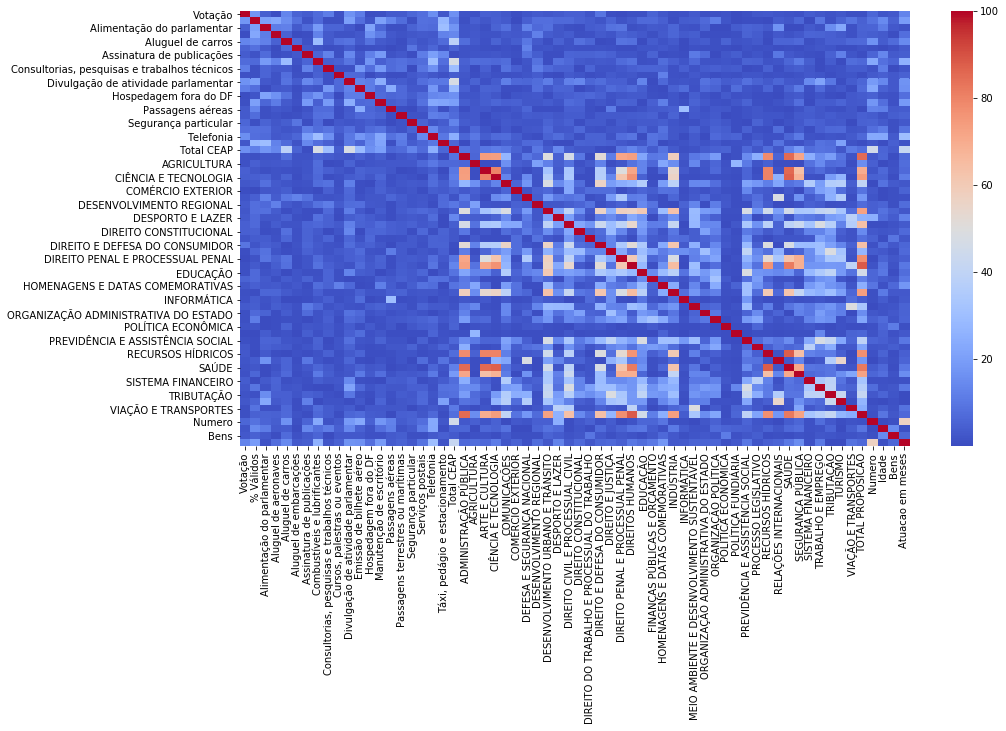

In [101]:
plt.figure(figsize=(15,8))
sns.heatmap(correlacao.replace(-100,100),cmap='coolwarm')

In [102]:
correlacao['Total CEAP'].idxmax()

'Combustíveis e lubrificantes'

In [103]:
correlacao['Total CEAP'].max()

47.351544795384669

In [104]:
correlacao['Total CEAP'].sort_values(ascending=False)

Combustíveis e lubrificantes                     47.351545
Divulgação de atividade parlamentar              47.323633
Numero                                           45.398735
Atuacao em meses                                 41.822004
Aluguel de carros                                38.396700
Consultorias, pesquisas e trabalhos técnicos     29.916555
Emissão de bilhete aéreo                         28.576621
Telefonia                                        24.799167
Manutenção de escritório                         19.964064
SEGURANÇA PÚBLICA                                18.890633
Alimentação do parlamentar                       17.281175
Hospedagem fora do DF                            16.398357
Votação                                          16.278287
DESPORTO E LAZER                                 14.282985
Aluguel de aeronaves                             13.867778
DIREITOS HUMANOS                                 13.634098
Segurança particular                             13.0421

In [105]:
corr_CEAP = correlacao.drop(prop['AREAS_TEMATICAS_APRESENTACAO'].unique(), axis=1)
corr_CEAP.drop(prop['AREAS_TEMATICAS_APRESENTACAO'].unique(), axis=0, inplace=True)
corr_CEAP.drop('TOTAL PROPOSICAO', axis=1, inplace=True)
corr_CEAP.drop('TOTAL PROPOSICAO', axis=0, inplace=True)

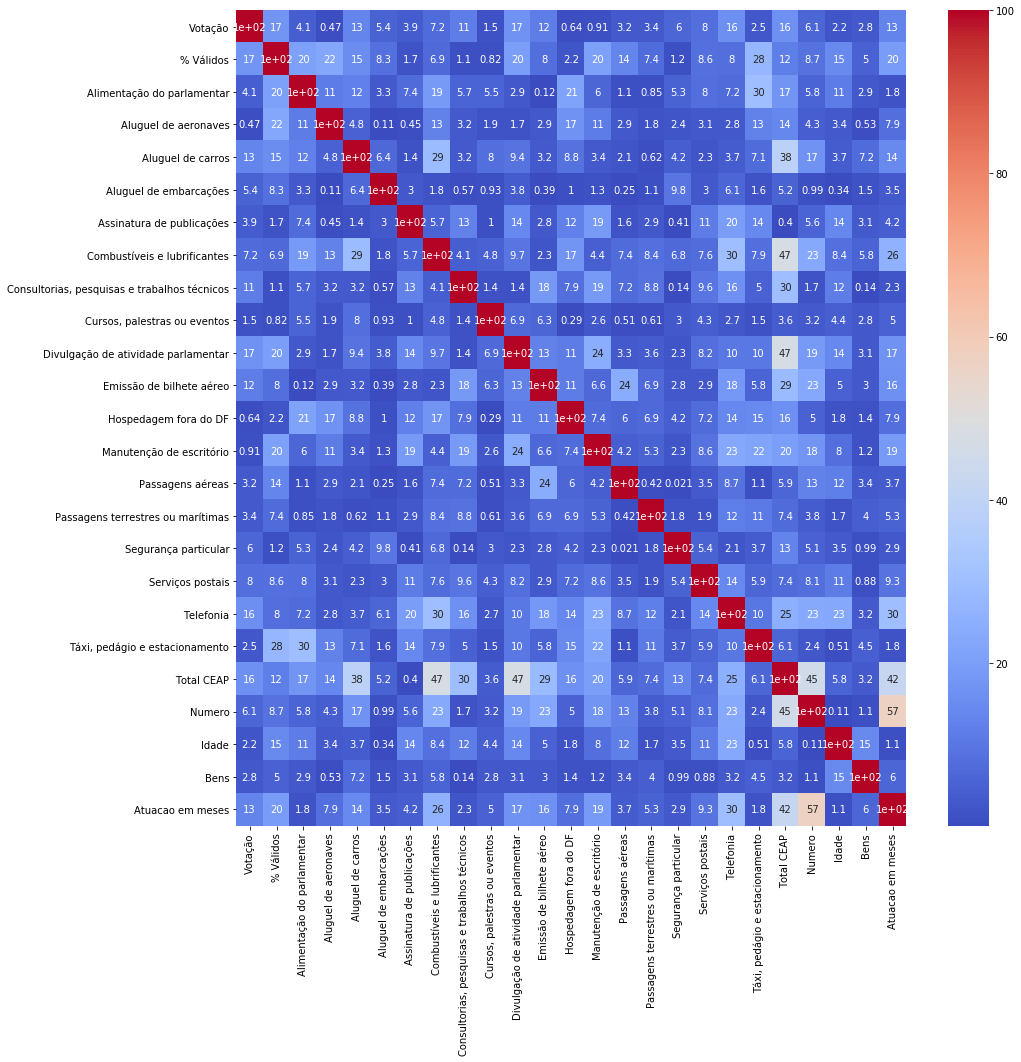

In [106]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_CEAP.replace(-100,100),cmap='coolwarm',annot=True)

In [107]:
corr_CEAP['Total CEAP'].idxmax()

'Combustíveis e lubrificantes'

In [108]:
corr_CEAP['Total CEAP'].max()

47.351544795384669

In [109]:
corr_CEAP['Total CEAP'].sort_values(ascending=False)

Combustíveis e lubrificantes                     47.351545
Divulgação de atividade parlamentar              47.323633
Numero                                           45.398735
Atuacao em meses                                 41.822004
Aluguel de carros                                38.396700
Consultorias, pesquisas e trabalhos técnicos     29.916555
Emissão de bilhete aéreo                         28.576621
Telefonia                                        24.799167
Manutenção de escritório                         19.964064
Alimentação do parlamentar                       17.281175
Hospedagem fora do DF                            16.398357
Votação                                          16.278287
Aluguel de aeronaves                             13.867778
Segurança particular                             13.042175
% Válidos                                        11.936753
Passagens terrestres ou marítimas                 7.422426
Serviços postais                                  7.3616

In [110]:
corr_PROP = correlacao.drop(dataset['txtDescricao'].unique(), axis=1)
corr_PROP.drop(dataset['txtDescricao'].unique(), axis=0, inplace=True)
corr_PROP.drop('Total CEAP', axis=1, inplace=True)
corr_PROP.drop('Total CEAP', axis=0, inplace=True)

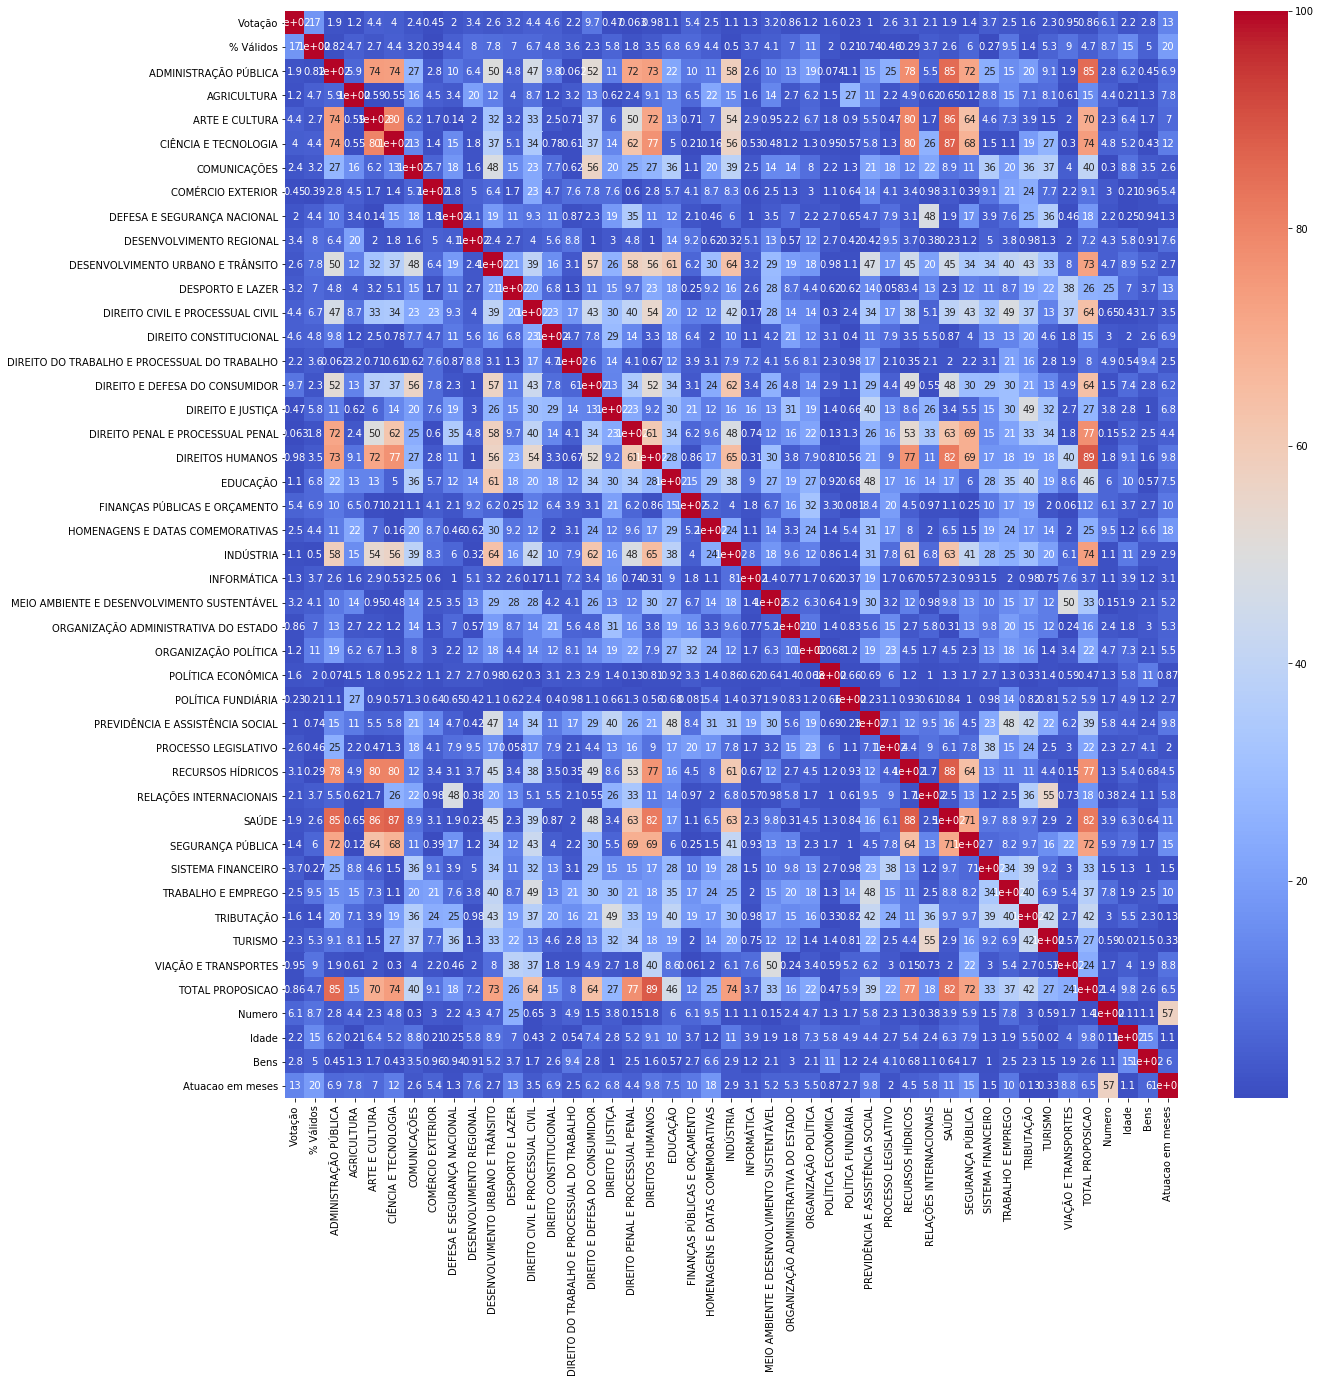

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_PROP.replace(-100,100),cmap='coolwarm',annot=True)

In [112]:
corr_PROP['TOTAL PROPOSICAO'].idxmax()

'DIREITOS HUMANOS'

In [113]:
corr_PROP['TOTAL PROPOSICAO'].max()

88.633841761019127

In [114]:
pd.get_dummies(deputados['Sexo'])

FEMININO  MASCULINO
0           0          1
1           0          1
2           0          1
3           0          1
4           0          1
5           0          1
6           0          1
7           0          1
8           0          1
9           0          1
10          0          1
11          0          1
12          0          1
13          0          1
14          0          1
15          0          1
16          1          0
17          0          1
18          0          1
19          0          1
20          0          1
21          0          1
22          0          1
23          0          1
24          0          1
25          1          0
26          0          1
27          0          1
28          0          1
29          1          0
..        ...        ...
554         0          1
555         0          1
556         1          0
557         0          1
558         0          1
559         0          1
560         1          0
561         0          1
562         0          1
563         0          1
564         1          0
565         0          1
566         0          1
567         0          1
568         1          0
569         0          1
570         0          1
571         0          1
572         0          1
573         0          1
574         0          1
575         0          1
576         0          1
577         0          1
578         0          1
579         0          1
580         0          1
581         0          1
582         0          1
583         0          1

[584 rows x 2 columns]

In [115]:
pd.get_dummies(deputados['Cor/Raça'])

Amarela  Branca  Parda  Preta
0          0       1      0      0
1          0       0      1      0
2          0       0      1      0
3          0       1      0      0
4          0       0      1      0
5          0       1      0      0
6          0       0      0      1
7          0       1      0      0
8          0       1      0      0
9          0       1      0      0
10         0       1      0      0
11         0       1      0      0
12         0       0      1      0
13         0       0      1      0
14         0       1      0      0
15         0       1      0      0
16         0       1      0      0
17         0       0      1      0
18         0       1      0      0
19         0       1      0      0
20         0       0      1      0
21         0       0      0      1
22         0       1      0      0
23         0       0      1      0
24         0       1      0      0
25         0       1      0      0
26         0       1      0      0
27         0       1      0      0
28         0       0      1      0
29         0       1      0      0
..       ...     ...    ...    ...
554        0       1      0      0
555        0       1      0      0
556        0       1      0      0
557        0       1      0      0
558        0       0      1      0
559        0       0      1      0
560        0       1      0      0
561        0       1      0      0
562        0       1      0      0
563        0       1      0      0
564        0       1      0      0
565        0       1      0      0
566        0       0      0      1
567        0       1      0      0
568        0       0      1      0
569        0       1      0      0
570        0       1      0      0
571        0       1      0      0
572        0       1      0      0
573        0       1      0      0
574        0       1      0      0
575        0       0      1      0
576        0       1      0      0
577        0       1      0      0
578        0       1      0      0
579        0       0      0      1
580        0       0      1      0
581        0       0      1      0
582        0       0      1      0
583        0       1      0      0

[584 rows x 4 columns]

In [116]:
pd.get_dummies(deputados['Instrucao'])

Ensino Fundamental completo  Ensino Fundamental incompleto  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   
5                              0                              0   
6                              0                              0   
7                              0                              0   
8                              0                              0   
9                              0                              0   
10                             0                              0   
11                             0                              0   
12                             0                              0   
13                             0                              0   
14                             0                              0   
15                             0                              0   
16                             0                              0   
17                             0                              0   
18                             0                              0   
19                             0                              0   
20                             0                              0   
21                             0                              0   
22                             0                              0   
23                             0                              0   
24                             0                              0   
25                             0                              0   
26                             0                              0   
27                             0                              0   
28                             0                              0   
29                             0                              0   
..                           ...                            ...   
554                            0                              0   
555                            0                              0   
556                            0                              0   
557                            0                              0   
558                            0                              0   
559                            0                              0   
560                            0                              0   
561                            0                              0   
562                            0                              0   
563                            0                              0   
564                            0                              0   
565                            0                              0   
566                            0                              0   
567                            0                              0   
568                            0                              0   
569                            0                              0   
570                            0                              0   
571                            0                              0   
572                            0                              0   
573                            0                              0   
574                            0                              0   
575                            0                              0   
576                            0                              0   
577                            0                              0   
578                            0                              0   
579                            0                              0   
580                            0                              0   
581                            0                    

In [117]:
cor = pd.get_dummies(deputados['Cor/Raça'])
deputados['Total CEAP'] = deputados['Total CEAP'].astype(float)
cor.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

Parda      2.635238
Amarela    0.959795
Branca    -1.252614
Preta     -2.624900
dtype: float64

In [118]:
instrucao = pd.get_dummies(deputados['Instrucao'])
instrucao.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

Ensino Fundamental incompleto     2.287625
Superior incompleto               2.053804
Ensino Médio incompleto           1.419431
Ensino Médio completo             0.929523
Ensino Fundamental completo      -1.145031
Superior completo                -1.298695
Lê e escreve                    -10.223621
dtype: float64

In [119]:
sexo = pd.get_dummies(deputados['Sexo'])
sexo.corrwith(deputados['Total CEAP']).sort_values(ascending=False)*100

MASCULINO    2.911834
FEMININO    -2.911834
dtype: float64

In [120]:
partidos.drop(['Idade','Bens','Atuacao em meses'], axis=1,inplace=True)

In [121]:
deputados['Partido Atual'].value_counts().sort_index()

DEM      33
PCdoB    15
PDT      24
PEN       3
PHS       6
PMDB     78
PODE     16
PP       51
PPS      12
PR       42
PRB      24
PROS      6
PRP       1
PRTB      1
PSB      39
PSC      11
PSD      39
PSDB     58
PSL       2
PSOL      6
PT       67
PTB      20
PTdoB     4
PV        8
REDE      4
SD       14
Name: Partido Atual, dtype: int64

In [122]:
partidos.sort_index(inplace=True)

In [123]:
partidos.head(19)

Votação  % Válidos  Alimentação do parlamentar  \
Partido Atual                                                   
DEM            3487633      93.83                10571.232150   
PCdoB          1000659      25.14                 1458.913875   
PDT            2077403      73.01                 7090.432597   
PEN             169454       3.33                  507.459591   
PHS             505921      14.49                 1591.607187   
PMDB           7595134     238.11                16828.279115   
PODE           1009891      33.22                 5634.355412   
PP             5405680     134.71                14089.883857   
PPS            1076992      17.99                 7744.645068   
PR             4906758     132.90                12403.156250   
PRB            3640967      66.44                 5793.966918   
PROS            675143      16.64                  516.099000   
PRP              66910       4.83                    0.000000   
PRTB             58095       4.20                  744.907500   
PSB            3531684     125.20                 9989.952472   
PSC            1728295      31.57                 2086.019350   
PSD            4089147     112.27                 7775.414794   
PSDB           7371020     170.65                14820.638720   
PSL             135233       1.98                  246.772813   

               Aluguel de aeronaves  Aluguel de carros  \
Partido Atual                                            
DEM                     8243.500000      126810.320575   
PCdoB                   6171.830792       62402.993641   
PDT                     5336.575397      111141.731205   
PEN                        0.000000       18647.435457   
PHS                        0.000000       34717.393438   
PMDB                   18607.027879      283941.304810   
PODE                    9392.795699       70936.276218   
PP                     24833.326342      211879.558248   
PPS                     1761.125000       32068.442959   
PR                     20949.843750      187758.186905   
PRB                    14695.434375       94898.644757   
PROS                       0.000000       18269.885188   
PRP                        0.000000           0.000000   
PRTB                       0.000000        6840.000000   
PSB                    18726.115521      195095.226831   
PSC                      783.035714       15786.599375   
PSD                    17588.863095      149404.501586   
PSDB                   27184.333813      171583.755485   
PSL                        0.000000        6915.437500   

               Aluguel de embarcações  Assinatura de publicações  \
Partido Atual                                                      
DEM                        297.175000                1504.252974   
PCdoB                        0.666667                 697.693365   
PDT                          0.000000                1025.948118   
PEN                          0.000000                 146.087500   
PHS                          0.000000                  77.667500   
PMDB                       399.310313                3215.721264   
PODE                       112.500000                 622.597669   
PP                          82.500000                2033.459725   
PPS                          4.533750                 468.240652   
PR                         174.375000                1885.360000   
PRB                         61.468750                 545.445694   
PROS                         0.000000                  25.676875   
PRP                          0.000000                   0.000000   
PRTB                         0.000000                   0.000000   
PSB                         39.062500                1835.364646   
PSC                          0.000000                 151.402188   
PSD                       2159.008437                1989.042689   
PSDB                        14.031250                4356.866002   
PSL                          0.000000                  29.062500   

 

In [124]:
for i in range(len(partidos)):
    partidos.iloc[i,2:] = partidos.iloc[i,2:]/deputados['Partido Atual'].value_counts().sort_index()[i]

In [125]:
partidos.sort_index(inplace= True)
partidos['Qtd'] = partidos1['Partido'].sort_index()
partidos['Total CEAP'] = partidos['Total CEAP'].astype(float)

In [126]:
partidos.sort_values('Qtd',ascending=False, inplace=True)

In [127]:
partidos.reset_index().to_csv("Partidos-BR-Dados-Por-Periodo.csv", sep=';', encoding='latin1',index=False, decimal=',')

In [128]:
partidos['TOTAL PROPOSICAO'] = partidos['TOTAL PROPOSICAO'].astype(float)
partidos.sort_values('TOTAL PROPOSICAO',ascending=True)

Votação  % Válidos  Alimentação do parlamentar  \
Partido Atual                                                   
PRTB             58095       4.20                  744.907500   
PEN             169454       3.33                  169.153197   
PRP              66910       4.83                    0.000000   
PSL             135233       1.98                  123.386406   
PT             7020059     170.94                  232.671705   
PSOL            939781      11.67                   31.389323   
PSDB           7371020     170.65                  255.528254   
PTB            1885331      50.69                  144.909472   
PR             4906758     132.90                  295.313244   
PSB            3531684     125.20                  256.152627   
PRB            3640967      66.44                  241.415288   
PPS            1076992      17.99                  645.387089   
PODE           1009891      33.22                  352.147213   
PCdoB          1000659      25.14                   97.260925   
PHS             505921      14.49                  265.267865   
PROS            675143      16.64                   86.016500   
DEM            3487633      93.83                  320.340368   
PDT            2077403      73.01                  295.434692   
PSC            1728295      31.57                  189.638123   
PTdoB           334514       6.21                   17.367969   
PSD            4089147     112.27                  199.369610   
PP             5405680     134.71                  276.272232   
PV              597478       9.27                  208.707628   
REDE            335289       5.15                  139.521875   
PMDB           7595134     238.11                  215.747168   
SD             1576563      38.03                  242.762183   

               Aluguel de aeronaves  Aluguel de carros  \
Partido Atual                                            
PRTB                       0.000000        6840.000000   
PEN                        0.000000        6215.811819   
PRP                        0.000000           0.000000   
PSL                        0.000000        3457.718750   
PT                       289.045199        3409.425154   
PSOL                       0.000000        1284.400469   
PSDB                     468.695411        2958.340612   
PTB                     1149.127635        3885.505408   
PR                       498.805804        4470.433022   
PSB                      480.156808        5002.441714   
PRB                      612.309766        3954.110198   
PPS                      146.760417        2672.370247   
PODE                     587.049731        4433.517264   
PCdoB                    411.455386        4160.199576   
PHS                        0.000000        5786.232240   
PROS                       0.000000        3044.980865   
DEM                      249.803030        3842.736987   
PDT                      222.357308        4630.905467   
PSC                       71.185065        1435.145398   
PTdoB                    179.984375        2618.298047   
PSD                      450.996490        3830.884656   
PP                       486.927967        4154.501142   
PV                         0.000000        3073.833001   
REDE                       0.000000         532.867188   
PMDB                     238.551639        3640.273139   
SD                       581.816384        3254.038884   

               Aluguel de embarcações  Assinatura de publicações  \
Partido Atual                                                      
PRTB                         0.000000                   0.000000   
PEN                          0.000000                  48.695833   
PRP                          0.000000                   0.000000   
PSL                          0.000000                  14.531250   
PT                           0.436730                  57.485824   
PSOL                         0.000000                  84.951823   
PSDB                     

In [129]:
deputados.groupby(["Partido Atual",'Sexo']).count()['Partido']

Partido Atual  Sexo     
DEM            FEMININO      2
               MASCULINO    31
PCdoB          FEMININO      6
               MASCULINO     9
PDT            FEMININO      2
               MASCULINO    22
PEN            MASCULINO     3
PHS            MASCULINO     6
PMDB           FEMININO      8
               MASCULINO    70
PODE           FEMININO      1
               MASCULINO    15
PP             FEMININO      2
               MASCULINO    49
PPS            FEMININO      4
               MASCULINO     8
PR             FEMININO      4
               MASCULINO    38
PRB            FEMININO      3
               MASCULINO    21
PROS           MASCULINO     6
PRP            MASCULINO     1
PRTB           MASCULINO     1
PSB            FEMININO      6
               MASCULINO    33
PSC            FEMININO      1
               MASCULINO    10
PSD            FEMININO      1
               MASCULINO    38
PSDB           FEMININO      6
               MASCULINO    52
PSL           

In [130]:
deputados.groupby(["Partido Atual",'Cor/Raça']).count()['Partido']

Partido Atual  Cor/Raça
DEM            Branca      27
               Parda        6
PCdoB          Branca       4
               Parda        7
               Preta        4
PDT            Branca      17
               Parda        6
               Preta        1
PEN            Branca       2
               Parda        1
PHS            Branca       2
               Parda        3
               Preta        1
PMDB           Branca      67
               Parda       10
               Preta        1
PODE           Branca      12
               Parda        4
PP             Amarela      1
               Branca      40
               Parda       10
PPS            Branca      11
               Parda        1
PR             Branca      34
               Parda        6
               Preta        2
PRB            Branca      16
               Parda        5
               Preta        3
PROS           Branca       6
PRP            Branca       1
PRTB           Branca       1
PSB            B

In [131]:
deputados.groupby(["Partido Atual",'Instrucao']).count()

Nome Civil  Partido  Coligação  \
Partido Atual Instrucao                                                       
DEM           Ensino Médio completo                   2        2          2   
              Superior completo                      27       27         27   
              Superior incompleto                     4        4          4   
PCdoB         Ensino Médio completo                   1        1          1   
              Superior completo                      11       11         11   
              Superior incompleto                     3        3          3   
PDT           Ensino Médio completo                   2        2          2   
              Superior completo                      21       21         21   
              Superior incompleto                     1        1          1   
PEN           Ensino Médio completo                   1        1          1   
              Superior completo                       1        1          1   
              Superior incompleto                     1        1          1   
PHS           Ensino Médio completo                   2        2          2   
              Superior completo                       3        3          3   
              Superior incompleto                     1        1          1   
PMDB          Ensino Fundamental completo             1        1          1   
              Ensino Médio completo                   3        3          3   
              Ensino Médio incompleto                 1        1          1   
              Superior completo                      65       65         65   
              Superior incompleto                     8        8          8   
PODE          Ensino Fundamental completo             1        1          1   
              Ensino Médio completo                   4        4          4   
              Superior completo                      10       10         10   
              Superior incompleto                     1        1          1   
PP            Ensino Fundamental completo             2        2          2   
              Ensino Médio completo                   6        6          6   
              Ensino Médio incompleto                 1        1          1   
              Superior completo                      38       38         38   
              Superior incompleto                     4        4          4   
PPS           Superior completo                      11       11         11   
...                                                 ...      ...        ...   
PSB           Superior incompleto                     3        3          3   
PSC           Ensino Médio completo                   1        1          1   
              Superior completo                       8        8          8   
              Superior incompleto                     2        2          2   
PSD           Ensino Médio completo                   4        4          4   
              Ensino Médio incompleto                 1        1          1   
              Superior completo                      31       31         31   
              Superior incompleto                     3        3          3   
PSDB          Ensino Médio completo                   2        2          2   
              Superior completo                      56       56         56   
PSL           Ensino Fundamental completo             1        1          1   
              Ensino Médio completo                   1        1          1   
PSOL          Superior completo                       6        6          6   
PT            Ensino Fundamental completo             4        4          4   
              Ensino Fundamental incompleto           1        1          1   
              Ensino Médio completo                   1        1          1   
              Superior completo                      60       60         60   
              Superior incompleto                     1        1          1   
PTB           En